<a href="https://colab.research.google.com/github/Tanu-N-Prabhu/Python/blob/master/Data%20Analysis/Level%205/time_series_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. GOAL

**Goal:**
To learn the basics of Time Series Analysis using Python with a simple dataset.

We will:
1. Understand what time series data is.
2. Create and explore a dataset.
3. Visualize trends and seasonality.
4. Apply moving averages for smoothing.
5. Decompose the series into trend, seasonality, and noise.
6. Build a basic ARIMA model for forecasting.

**Why:**
Time series analysis helps us understand patterns over time and make predictions.
It’s used in sales forecasting, weather predictions, stock market trends, etc.

# 2. INTRODUCTION

**Time Series:**
A sequence of data points collected at consistent intervals over time.
Key components:
- Trend: Long-term movement (upward/downward)
- Seasonality: Regular repeating patterns
- Noise: Random fluctuations

**Example:** Monthly sales numbers, daily temperatures, weekly website visits.

In this notebook:
We will simulate monthly sales data for 4 years (2020–2023) with a trend and seasonality.

# 3. IMPORT LIBRARIES




In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima.model import ARIMA

plt.style.use('seaborn-v0_8-whitegrid')

# 4. CREATE A SIMPLE DATASET

We'll create a dataset with:
- A linear upward trend
- A yearly seasonal pattern
- Random noise

In [11]:
dates = pd.date_range(start="2020-01-01", periods=48, freq='M')
trend = np.arange(48) * 2
seasonality = 15 * np.sin(np.arange(48) * np.pi / 6)  # seasonal effect
noise = np.random.normal(0, 5, 48)
sales = 200 + trend + seasonality + noise

df = pd.DataFrame({'Date': dates, 'Sales': sales})
df.set_index('Date', inplace=True)

print("First 5 rows of our dataset:")
df.head()

First 5 rows of our dataset:


/tmp/ipython-input-3408499402.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(start="2020-01-01", periods=48, freq='M')


,Sales
Date,
2020-01-31,195.686768
2020-02-29,212.172263
2020-03-31,215.683621
2020-04-30,230.785688
2020-05-31,226.090495


# 5. PLOT THE TIME SERIES

We plot the data to visually identify:
- Upward trend
- Seasonal spikes
- Irregular fluctuations

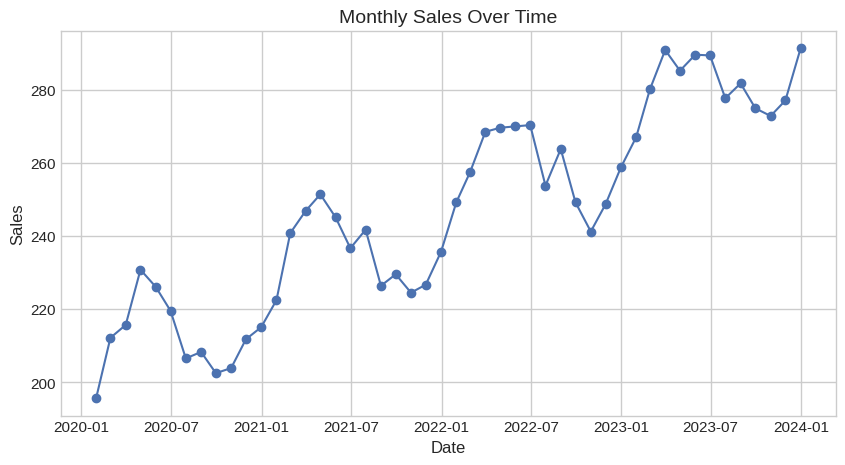

In [12]:
plt.figure(figsize=(10,5))
plt.plot(df.index, df['Sales'], marker='o')
plt.title("Monthly Sales Over Time", fontsize=14)
plt.xlabel("Date")
plt.ylabel("Sales")
plt.show()

# 6. MOVING AVERAGES

Moving averages smooth out fluctuations and highlight trends.

- 3-Month MA: Smooths short-term noise.
- 6-Month MA: Gives a clearer picture of the long-term trend.

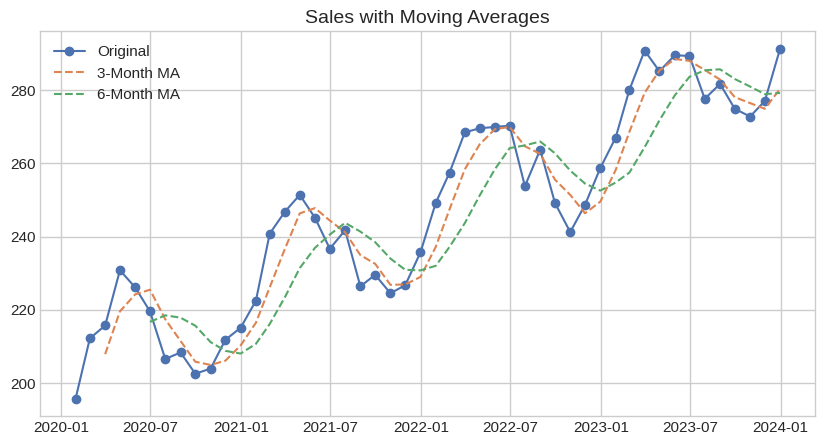

In [13]:
df['MA_3'] = df['Sales'].rolling(window=3).mean()
df['MA_6'] = df['Sales'].rolling(window=6).mean()

plt.figure(figsize=(10,5))
plt.plot(df['Sales'], label='Original', marker='o')
plt.plot(df['MA_3'], label='3-Month MA', linestyle='--')
plt.plot(df['MA_6'], label='6-Month MA', linestyle='--')
plt.title("Sales with Moving Averages", fontsize=14)
plt.legend()
plt.show()

# 7. DECOMPOSING THE SERIES
Decomposition breaks the series into:
- Trend: Long-term progression
- Seasonality: Repeating patterns
- Residual: Noise/random variation

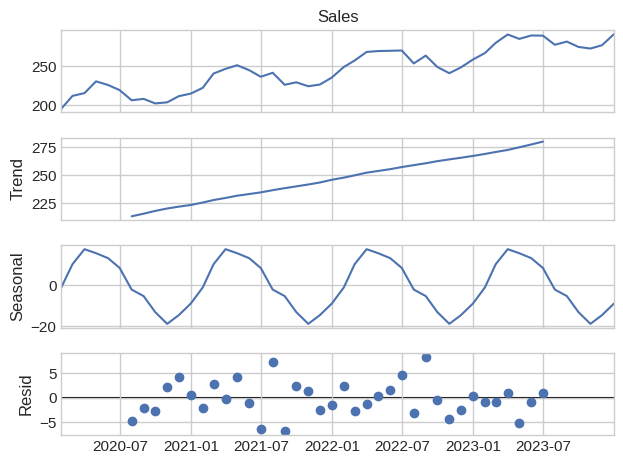

In [14]:
decomposition = seasonal_decompose(df['Sales'], model='additive', period=12)
decomposition.plot()
plt.show()

# 8. BASIC FORECASTING WITH ARIMA

ARIMA (AutoRegressive Integrated Moving Average):
- AR: Uses past values
- I: Makes data stationary
- MA: Uses past forecast errors

We'll build a simple (1,1,1) ARIMA model to forecast the next 6 months.





/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
/tmp/ipython-input-3628613687.py:8: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  future_dates = pd.date_range(start=df.index[-1], periods=7, freq='M')[1:]


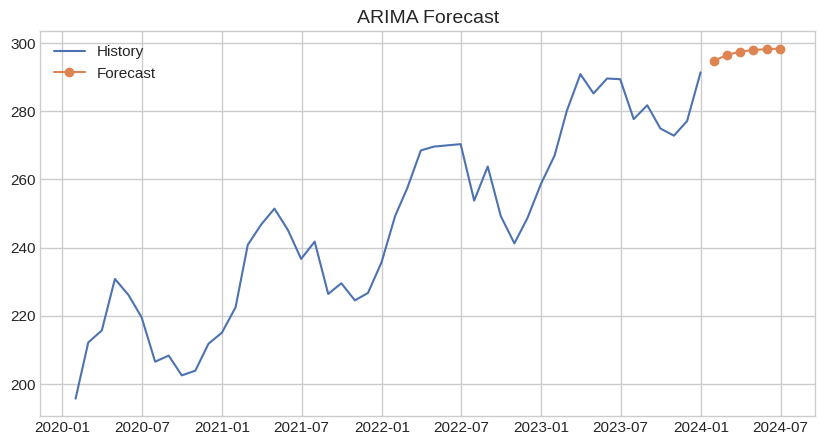

Forecasted Sales for next 6 months:
2024-01-31    294.741040
2024-02-29    296.511773
2024-03-31    297.443182
2024-04-30    297.933104
2024-05-31    298.190805
2024-06-30    298.326355
Freq: ME, Name: predicted_mean, dtype: float64


In [15]:
model = ARIMA(df['Sales'], order=(1,1,1))
model_fit = model.fit()
forecast = model_fit.forecast(steps=6)

# Plot historical and forecasted values
plt.figure(figsize=(10,5))
plt.plot(df['Sales'], label='History')
future_dates = pd.date_range(start=df.index[-1], periods=7, freq='M')[1:]
plt.plot(future_dates, forecast, label='Forecast', marker='o')
plt.title("ARIMA Forecast", fontsize=14)
plt.legend()
plt.show()

print("Forecasted Sales for next 6 months:")
print(forecast)

# 9. CONCLUSION

We covered:
1. Creating a time series dataset.
2. Visualizing data to see trends and seasonality.
3. Using moving averages for smoothing.
4. Decomposing time series.
5. Building a basic ARIMA forecast.

Next steps:
- Work with real datasets (Kaggle, business sales data).
- Experiment with different ARIMA parameters.
- Try seasonal models like SARIMA.
